# Core Python for Data Science

## 1. Python Basics Refresher

In [1]:
# Functions
def normalize(x):
    return (x - min(x)) / (max(x) - min(x))

In [2]:
# List comprehensions
squares = [i**2 for i in range(10)]
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [3]:
# Dictionary comprehensions
word = 'banana'
freqs = {char: word.count(char) for char in set(word)}
print(freqs)

{'b': 1, 'n': 2, 'a': 3}


In [4]:
# Enumerate and zip
for i, val in enumerate(['a', 'b', 'c']):
    print(i, val)

for x, y in zip([1,2,3], ['a','b','c']):
    print(x, y)

0 a
1 b
2 c
1 a
2 b
3 c


## 2. Object-Oriented Programming (OOP) Basics

In [5]:
class Dataset:
    def __init__(self, data):
        self.data = data

    def mean(self):
        return sum(self.data) / len(self.data)

d = Dataset([1, 2, 3])
print(d.mean())  # 2.0

2.0


## 3. Scikit-Learn Patterns

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=10)
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load and split the data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# Evaluate
score = clf.score(X_test, y_test)
print("Test accuracy:", score)


Test accuracy: 1.0


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# SVC with a pipeline (standard practice)
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf"))
])

pipe.fit(X_train, y_train)
print("Pipeline SVC test score:", pipe.score(X_test, y_test))


Pipeline SVC test score: 1.0


In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "svc__C": [0.1, 1, 10],
    "svc__gamma": ["scale", 0.01, 0.001]
}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)


Best parameters: {'svc__C': 1, 'svc__gamma': 'scale'}
Best cross-validation score: 0.9428571428571428


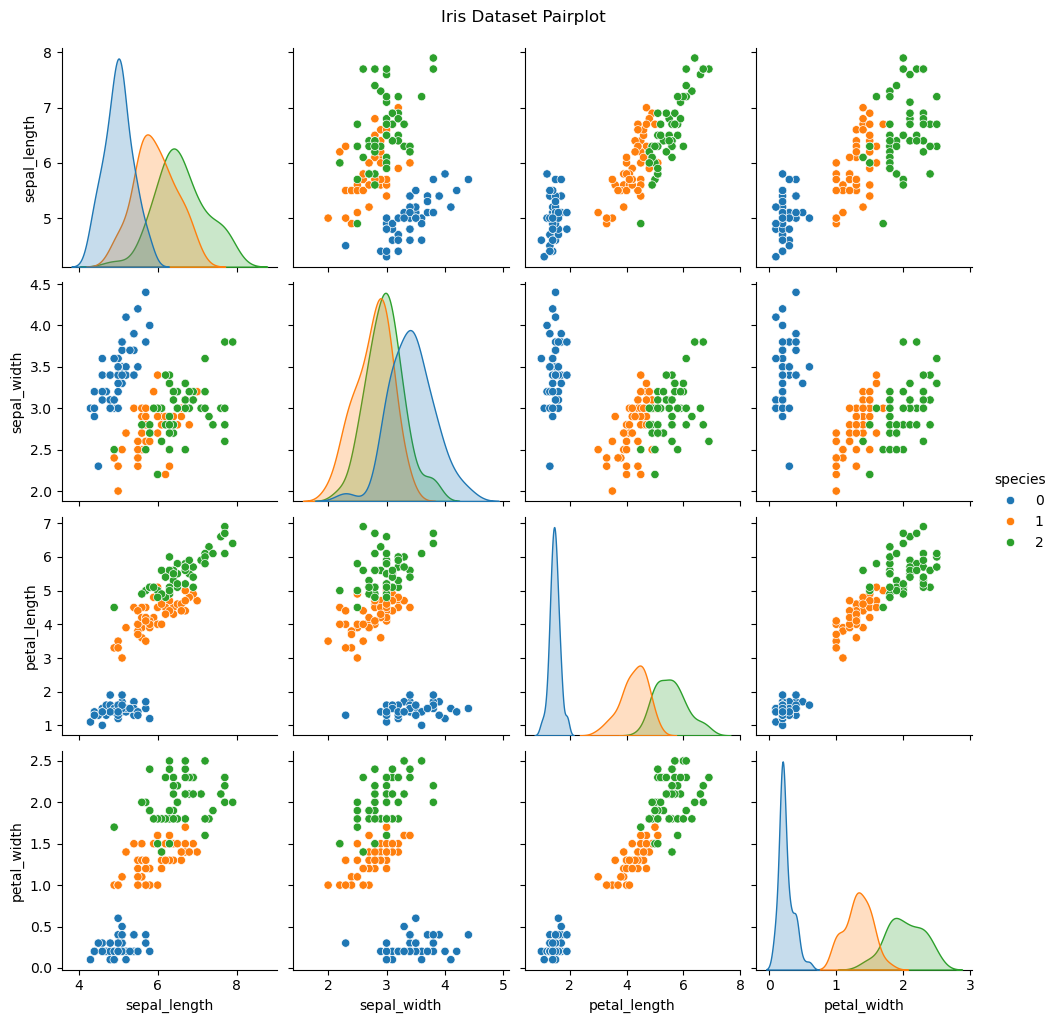

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(X, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df["species"] = y

sns.pairplot(df, hue="species", palette="tab10")
plt.suptitle("Iris Dataset Pairplot", y=1.02)
plt.show()
